In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
#import altair as alt
#alt.renderers.enable('notebook') #Necessary for Altair to work

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
transcriptomics = CPTAC.get_transcriptomics()
transcriptomics_columns = CPTAC.get_transcriptomics_cols()

#print(transcriptomics_columns)
#print(transcriptomics)

In [4]:
siteList = transcriptomics_columns

### Look through our list of sites, test for difference in transcriptomics levels when ARID1A is mutated

In [5]:
#Just look at first 1000 while debug
siteList = siteList[0:1000]
p_values = []
site_names = []
gene = 'ARID1A'

'''Perform a T-Test comparing transcriptomics levels when ARID1A is mutated vs wildtype, in tumor patients only'''
for site in siteList:
    transdf = CPTAC.compare_mutations(transcriptomics, site, gene)
    transdf = transdf.loc[transdf["Patient_Type"] == "Tumor"]
    #print(transdf)
    wtdf = transdf.loc[transdf["Mutation"] == "Wildtype"]
    mutateddf = transdf.loc[transdf["Mutation"] != "Wildtype"]
    ttest = scipy.stats.ttest_ind(wtdf[site], mutateddf[site])
    p_values.append(ttest[1])
    site_names.append(site)


In [6]:
print(p_values)
print(site_names)

[0.029689655232897332, 0.0014445222787237727, 0.24513237845133012, 0.006841439395822678, 0.0008417709356276351, 0.27657788709515607, 0.033738510528518194, 0.1771835754379716, 0.08850728482287291, 0.032015111193509374, 0.11534405040894982, 0.27859098200035226, 0.417904465250326, 0.670070348867743, 0.9064653974219756, 0.9247986665688164, 0.0024257307068124043, 0.09419600909086374, 0.8768300551502177, 0.7770525930066012, 0.3102149531270453, 0.0024530458936019225, 0.002115624248994236, 0.0002271204550851413, 0.051471085719645884, 0.48216288224874915, 0.29237604497213554, 0.5325727884504816, 0.012961992477409206, 0.45431089174510464, 0.5183088885694744, 0.0717861898191475, 0.46008760995942444, 0.44843591242493785, 0.0009370752012220999, 0.1166262861535191, 0.38120517765847894, 0.047518125590411214, 0.5857638149074321, 0.5970055269923016, 0.3089075821075356, 0.09915862249217348, 0.373314402009586, 0.1114000755216804, 0.40574315836774244, 0.00028605325181251483, 0.1452122558678528, 0.00040145

## Get the top 100 most significant

In [10]:
pvalDict = dict(zip(p_values, site_names))

print(pvalDict)

sorted_dict = sorted(pvalDict.items(), key=lambda kv: kv[1])

print(sorted_dict)

{0.029689655232897332: 'A1BG', 0.0014445222787237727: 'A1BG-AS1', 0.24513237845133012: 'A1CF', 0.006841439395822678: 'A2M', 0.0008417709356276351: 'A2M-AS1', 0.27657788709515607: 'A2ML1', 0.033738510528518194: 'A2MP1', 0.1771835754379716: 'A3GALT2', 0.08850728482287291: 'A4GALT', 0.032015111193509374: 'A4GNT', 0.11534405040894982: 'AA06', 0.27859098200035226: 'AAAS', 0.417904465250326: 'AACS', 0.670070348867743: 'AACSP1', 0.9064653974219756: 'AADAC', 0.9247986665688164: 'AADACL2', 0.0024257307068124043: 'AADACL2-AS1', 0.09419600909086374: 'AADACL3', 0.8768300551502177: 'AADACL4', 0.7770525930066012: 'AADACP1', 0.3102149531270453: 'AADAT', 0.0024530458936019225: 'AAED1', 0.002115624248994236: 'AAGAB', 0.0002271204550851413: 'AAK1', 0.051471085719645884: 'AAMDC', 0.48216288224874915: 'AAMP', 0.29237604497213554: 'AANAT', 0.5325727884504816: 'AAR2', 0.012961992477409206: 'AARD', 0.45431089174510464: 'AARS', 0.5183088885694744: 'AARS2', 0.0717861898191475: 'AARSD1', 0.46008760995942444: 'A

### Plot the significant sites, Mutated vs Wildtype

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation')]

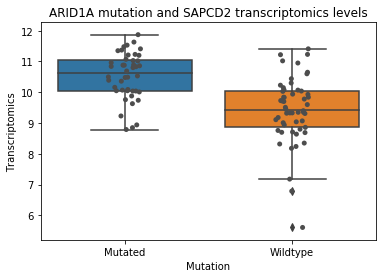

In [5]:
gene = "ARID1A"
site = "SAPCD2"

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)


for i, row in genedf.iterrows():
    id = i
    if row['Mutation'] != 'Wildtype':
        genedf.set_value(id,'Mutation','Mutated')

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation",ylabel="Transcriptomics")

### Plot significant sites, look at all mutations

[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation Type')]

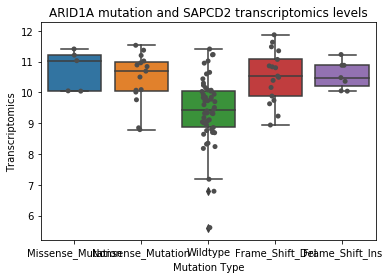

In [6]:

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation Type",ylabel="Transcriptomics")